## Modellierung (2)

Multiple lineare Regression nach ÖV-Güteklasse (ÖV-Güteklasse & sozioökonomische-Faktoren)
1) ohne sozioökonomische Faktoren
2) dann Erweiterung

unabhängige Variable (X-Parameter) :
- Numerisch: Alter
- Kategorisch: Haushaltseinkommen, Geschlecht, Alter, ÖV-Güteklasse

abhängige Variable (Y-Parameter) : 
- CO₂-Emissionen

Szenario-Analyse: Analog zu Literatur-Erkentnissen (e.g., Bevölkerungszuwachs in Städten etc.)

## 0. Vorbereitung: Import der benötigten Python-Libraries 

In [123]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import seaborn as sns

In [124]:
# Daten einlesen
gdf = gpd.read_file('Daten/wege.gpkg')
print(gdf.head())

     HHNR  HH_BFS_NR  HH_PLZ    HH_ORT  HH_KANTON  HH_OEV_GUETEKLASSE  \
0  110001       5624    1030  Bussigny         22                   3   
1  110001       5624    1030  Bussigny         22                   3   
2  110001       5624    1030  Bussigny         22                   3   
3  110001       5624    1030  Bussigny         22                   3   
4  110001       5624    1030  Bussigny         22                   3   

   HH_STADT_LAND  HH_HAUSHALTSGROESSE  HH_HAUSHALTSEINKOMMEN  ZP_ALTER  ...  \
0  Städtisch (1)                    2                      5        57  ...   
1  Städtisch (1)                    2                      5        57  ...   
2  Städtisch (1)                    2                      5        57  ...   
3  Städtisch (1)                    2                      5        57  ...   
4  Städtisch (1)                    2                      5        57  ...   

   FAHRZEUG_ENERGIEEFFIZIENZKLASSE  FAHRZEUG_VERBRAUCH  EL_Verbrauch  \
0             

In [125]:
gdf.head()

,HHNR,HH_BFS_NR,HH_PLZ,HH_ORT,HH_KANTON,HH_OEV_GUETEKLASSE,HH_STADT_LAND,HH_HAUSHALTSGROESSE,HH_HAUSHALTSEINKOMMEN,ZP_ALTER,...,FAHRZEUG_ENERGIEEFFIZIENZKLASSE,FAHRZEUG_VERBRAUCH,EL_Verbrauch,FAHRZEUG_JAHR_ERSTE_INVERKEHRSSETZUNG,ABSCHNITTLÄNGE_IN_KM,HH_RAUMTYPOLOGIE_9,CO2E_KG_KM_AUTO,CO2E_KG_KM_OTHER,CO2E_TOTAL,geometry
0,110001,5624,1030,Bussigny,22,3,Städtisch (1),2,5,57,...,D,-99.0,-99.0,-97.0,0.414223,Städtische Gemeinde einer grossen Agglomeratio...,200.4,NaN,83.010354,"LINESTRING Z (2532653.357 1155702.624 420.558,..."
1,110001,5624,1030,Bussigny,22,3,Städtisch (1),2,5,57,...,D,-99.0,-99.0,-97.0,0.307909,Städtische Gemeinde einer grossen Agglomeratio...,200.4,NaN,61.705018,"LINESTRING Z (2532933.573 1155665.561 430.418,..."
2,110001,5624,1030,Bussigny,22,3,Städtisch (1),2,5,57,...,D,-99.0,-99.0,-97.0,0.586282,Städtische Gemeinde einer grossen Agglomeratio...,200.4,NaN,117.490869,"LINESTRING Z (2533071.108 1155894.339 430.657,..."
3,110001,5624,1030,Bussigny,22,3,Städtisch (1),2,5,57,...,D,-99.0,-99.0,-97.0,1.599024,Städtische Gemeinde einer grossen Agglomeratio...,200.4,NaN,320.444438,MULTILINESTRING Z ((2532653.357 1155702.624 41...
4,110001,5624,1030,Bussigny,22,3,Städtisch (1),2,5,57,...,D,-99.0,-99.0,-97.0,2.445678,Städtische Gemeinde einer grossen Agglomeratio...,200.4,NaN,490.113940,"LINESTRING Z (2532957.334 1156871.023 475.614,..."


In [126]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 552622 entries, 0 to 552621
Data columns (total 41 columns):
 #   Column                                 Non-Null Count   Dtype   
---  ------                                 --------------   -----   
 0   HHNR                                   552622 non-null  int64   
 1   HH_BFS_NR                              552622 non-null  int64   
 2   HH_PLZ                                 552622 non-null  int64   
 3   HH_ORT                                 552622 non-null  object  
 4   HH_KANTON                              552622 non-null  int64   
 5   HH_OEV_GUETEKLASSE                     552622 non-null  int64   
 6   HH_STADT_LAND                          552622 non-null  object  
 7   HH_HAUSHALTSGROESSE                    552622 non-null  int64   
 8   HH_HAUSHALTSEINKOMMEN                  552622 non-null  int64   
 9   ZP_ALTER                               552622 non-null  int64   
 10  ZP_GESL                             

### Korrelationsanalyse

                       ZP_ALTER   ZP_GESL  HH_HAUSHALTSEINKOMMEN  CO2E_TOTAL  \
ZP_ALTER               1.000000 -0.002659               0.360617    0.035641   
ZP_GESL               -0.002659  1.000000              -0.058462   -0.035561   
HH_HAUSHALTSEINKOMMEN  0.360617 -0.058462               1.000000    0.033423   
CO2E_TOTAL             0.035641 -0.035561               0.033423    1.000000   
HH_OEV_GUETEKLASSE     0.009082 -0.015998              -0.017035    0.113177   

                       HH_OEV_GUETEKLASSE  
ZP_ALTER                         0.009082  
ZP_GESL                         -0.015998  
HH_HAUSHALTSEINKOMMEN           -0.017035  
CO2E_TOTAL                       0.113177  
HH_OEV_GUETEKLASSE               1.000000  


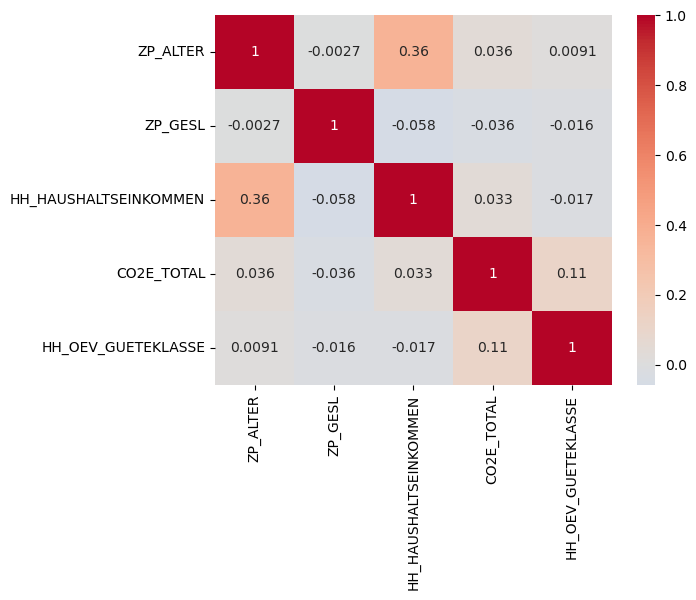

In [127]:
# Korrelation überprüfen
correlation_matrix = gdf[['ZP_ALTER', 'ZP_GESL', 'HH_HAUSHALTSEINKOMMEN', 'CO2E_TOTAL', 'HH_OEV_GUETEKLASSE']].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()


Das dargestellte DataFrame zeigt die Korrelationsmatrix zwischen den Variablen. Korrelationskoeffizienten variieren zwischen -1 (perfekte negative Korrelation) und 1 (perfekte positive Korrelation), wobei 0 keine Korrelation bedeutet. Es gibt eine geringe Korrelation zwischen Alter und Haushaltseinkommen. Dies ist plausibel, da mit zunehmendem Alter das Einkommen tendenziell ansteigen kann. 

Von Bedeutung ist die Korrelation zwischen CO2E_TOTAL und HH_OEV_GUETEKLASSE. Diese ist positiv (0.011), wenn auch schwach, was möglicherweise bedeutet, dass Menschen in unterschiedlichen Güteklassen leicht variierende Emissionsmuster aufweisen.

## 2. Vorverarbeitung der Daten

Die Verarbeitung wurde bei der Bearbeitung des Originaldatensatzes bzw. bei der Ermittlung der CO₂-Werte grösstenteils bereits abgeschlossen. Es sind lediglich minimale Anpassungen erforderlich, um kategorische Werte in numerische Dummy-Variablen umzuwandeln. Dies betrifft ausschliesslich die Parameter HH_STADT_LAND, ZP_GESL und HH_HAUSHALTSEINKOMMEN.

In [128]:
# Nur relevante Variablen beibehalten
gdf_bereinigt = gdf[['CO2E_TOTAL', 'ZP_ALTER', 'ZP_GESL', 'HH_HAUSHALTSEINKOMMEN', 'HH_OEV_GUETEKLASSE', 'geometry']]

# Datensatz bereinigen: Nur Zeilen mit nicht-leeren Werten in den relevanten Spalten
gdf_bereinigt = gdf_bereinigt.dropna()

In [129]:
print(type(gdf_bereinigt))

<class 'geopandas.geodataframe.GeoDataFrame'>


### Dummy Variablen erstellen

In [130]:
# Die Werte in ZP_GESL bedeuten: 1 = Mann und 2 = Frau
# Männer werden weggelassen, da sie als Referenzkategorie dienen, somit wird nur die Variable ZP_GESL_2 benötigt (Frauen)

gdf_bereinigt = pd.get_dummies(gdf_bereinigt, columns=['ZP_GESL'], drop_first=True)

# In Integer umwandeln (für die Regression)
gdf_bereinigt['ZP_GESL_2'] = gdf_bereinigt['ZP_GESL_2'].astype(int)

gdf_bereinigt.head()

,CO2E_TOTAL,ZP_ALTER,HH_HAUSHALTSEINKOMMEN,HH_OEV_GUETEKLASSE,geometry,ZP_GESL_2
0,83.010354,57,5,3,"LINESTRING Z (2532653.357 1155702.624 420.558,...",0
1,61.705018,57,5,3,"LINESTRING Z (2532933.573 1155665.561 430.418,...",0
2,117.490869,57,5,3,"LINESTRING Z (2533071.108 1155894.339 430.657,...",0
3,320.444438,57,5,3,MULTILINESTRING Z ((2532653.357 1155702.624 41...,0
4,490.113940,57,5,3,"LINESTRING Z (2532957.334 1156871.023 475.614,...",0


In [131]:
# Dummy Variabeln werden erstellt. Güteklasse 1 wird weg gelassen, da sie die Referenzklasse ist.
gdf_bereinigt = pd.get_dummies(gdf_bereinigt, columns=['HH_OEV_GUETEKLASSE'], drop_first=True)
gdf_bereinigt.head()

,CO2E_TOTAL,ZP_ALTER,HH_HAUSHALTSEINKOMMEN,geometry,ZP_GESL_2,HH_OEV_GUETEKLASSE_2,HH_OEV_GUETEKLASSE_3,HH_OEV_GUETEKLASSE_4,HH_OEV_GUETEKLASSE_5
0,83.010354,57,5,"LINESTRING Z (2532653.357 1155702.624 420.558,...",0,False,True,False,False
1,61.705018,57,5,"LINESTRING Z (2532933.573 1155665.561 430.418,...",0,False,True,False,False
2,117.490869,57,5,"LINESTRING Z (2533071.108 1155894.339 430.657,...",0,False,True,False,False
3,320.444438,57,5,MULTILINESTRING Z ((2532653.357 1155702.624 41...,0,False,True,False,False
4,490.113940,57,5,"LINESTRING Z (2532957.334 1156871.023 475.614,...",0,False,True,False,False


In [132]:
# Dummy-Variablen in numerische Werte umwandeln
gdf_bereinigt['HH_OEV_GUETEKLASSE_2'] = gdf_bereinigt['HH_OEV_GUETEKLASSE_2'].astype(int)
gdf_bereinigt['HH_OEV_GUETEKLASSE_3'] = gdf_bereinigt['HH_OEV_GUETEKLASSE_3'].astype(int)
gdf_bereinigt['HH_OEV_GUETEKLASSE_4'] = gdf_bereinigt['HH_OEV_GUETEKLASSE_4'].astype(int)
gdf_bereinigt['HH_OEV_GUETEKLASSE_5'] = gdf_bereinigt['HH_OEV_GUETEKLASSE_5'].astype(int)

In [133]:
gdf_bereinigt.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 473372 entries, 0 to 552621
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   CO2E_TOTAL             473372 non-null  float64 
 1   ZP_ALTER               473372 non-null  int64   
 2   HH_HAUSHALTSEINKOMMEN  473372 non-null  int64   
 3   geometry               473372 non-null  geometry
 4   ZP_GESL_2              473372 non-null  int32   
 5   HH_OEV_GUETEKLASSE_2   473372 non-null  int32   
 6   HH_OEV_GUETEKLASSE_3   473372 non-null  int32   
 7   HH_OEV_GUETEKLASSE_4   473372 non-null  int32   
 8   HH_OEV_GUETEKLASSE_5   473372 non-null  int32   
dtypes: float64(1), geometry(1), int32(5), int64(2)
memory usage: 27.1 MB


In [134]:
# Bedeutung der Kategorien:
# - -99	Nicht gestellt, da Zielperson jünger als 18 ist
# - -98	keine Antwort
# - -97	weiss nicht
# Es macht keinen Sinn, dass eine dieser Kategorien die Referenzkategorie ist. Die Daten sind zudem nicht relevant für die Regression. Deshalb werden die Daten gelöscht. 
gdf_bereinigt = gdf_bereinigt[~gdf_bereinigt['HH_HAUSHALTSEINKOMMEN'].isin([-99, -98, -97])]

# Dummy-Variablen erstellen und die Referenzkategorie auf HH_HAUSHALTSEINKOMMEN_1 setzen
gdf_bereinigt = pd.get_dummies(gdf_bereinigt, columns=['HH_HAUSHALTSEINKOMMEN'], drop_first=True)

gdf_bereinigt.head()



,CO2E_TOTAL,ZP_ALTER,geometry,ZP_GESL_2,HH_OEV_GUETEKLASSE_2,HH_OEV_GUETEKLASSE_3,HH_OEV_GUETEKLASSE_4,HH_OEV_GUETEKLASSE_5,HH_HAUSHALTSEINKOMMEN_2,HH_HAUSHALTSEINKOMMEN_3,HH_HAUSHALTSEINKOMMEN_4,HH_HAUSHALTSEINKOMMEN_5,HH_HAUSHALTSEINKOMMEN_6,HH_HAUSHALTSEINKOMMEN_7,HH_HAUSHALTSEINKOMMEN_8,HH_HAUSHALTSEINKOMMEN_9
0,83.010354,57,"LINESTRING Z (2532653.357 1155702.624 420.558,...",0,0,1,0,0,False,False,False,True,False,False,False,False
1,61.705018,57,"LINESTRING Z (2532933.573 1155665.561 430.418,...",0,0,1,0,0,False,False,False,True,False,False,False,False
2,117.490869,57,"LINESTRING Z (2533071.108 1155894.339 430.657,...",0,0,1,0,0,False,False,False,True,False,False,False,False
3,320.444438,57,MULTILINESTRING Z ((2532653.357 1155702.624 41...,0,0,1,0,0,False,False,False,True,False,False,False,False
4,490.113940,57,"LINESTRING Z (2532957.334 1156871.023 475.614,...",0,0,1,0,0,False,False,False,True,False,False,False,False


In [135]:
# Umwandlung der Haushaltseinkommen in kategorische Variablen
einkommen_kategorien = ['HH_HAUSHALTSEINKOMMEN_2', 'HH_HAUSHALTSEINKOMMEN_3', 'HH_HAUSHALTSEINKOMMEN_4',
    'HH_HAUSHALTSEINKOMMEN_5', 'HH_HAUSHALTSEINKOMMEN_6', 'HH_HAUSHALTSEINKOMMEN_7',
    'HH_HAUSHALTSEINKOMMEN_8', 'HH_HAUSHALTSEINKOMMEN_9'
]

for kategorie in einkommen_kategorien:
    gdf_bereinigt[kategorie] = gdf_bereinigt[kategorie].astype(int)

gdf_bereinigt.head()

,CO2E_TOTAL,ZP_ALTER,geometry,ZP_GESL_2,HH_OEV_GUETEKLASSE_2,HH_OEV_GUETEKLASSE_3,HH_OEV_GUETEKLASSE_4,HH_OEV_GUETEKLASSE_5,HH_HAUSHALTSEINKOMMEN_2,HH_HAUSHALTSEINKOMMEN_3,HH_HAUSHALTSEINKOMMEN_4,HH_HAUSHALTSEINKOMMEN_5,HH_HAUSHALTSEINKOMMEN_6,HH_HAUSHALTSEINKOMMEN_7,HH_HAUSHALTSEINKOMMEN_8,HH_HAUSHALTSEINKOMMEN_9
0,83.010354,57,"LINESTRING Z (2532653.357 1155702.624 420.558,...",0,0,1,0,0,0,0,0,1,0,0,0,0
1,61.705018,57,"LINESTRING Z (2532933.573 1155665.561 430.418,...",0,0,1,0,0,0,0,0,1,0,0,0,0
2,117.490869,57,"LINESTRING Z (2533071.108 1155894.339 430.657,...",0,0,1,0,0,0,0,0,1,0,0,0,0
3,320.444438,57,MULTILINESTRING Z ((2532653.357 1155702.624 41...,0,0,1,0,0,0,0,0,1,0,0,0,0
4,490.113940,57,"LINESTRING Z (2532957.334 1156871.023 475.614,...",0,0,1,0,0,0,0,0,1,0,0,0,0


## 3. Modell Trainieren und Analysieren

In [136]:
# Aufteilen in Trainings- und Testdaten (80% Training, 20% Test) sowie Random State setzen
from sklearn.model_selection import train_test_split
train, test = train_test_split(gdf_bereinigt, test_size=0.2, random_state=42)

In [137]:
# Ergebnisse anzeigen
print(f"Trainingsdaten: {train.shape}")
print(f"Testdaten: {test.shape}")

Trainingsdaten: (286147, 16)
Testdaten: (71537, 16)


### Lineare Regression (Emissionen, ÖV-Güteklasse)

In [138]:
# Parameter für die Regression
X0 = train[['HH_OEV_GUETEKLASSE_2', 'HH_OEV_GUETEKLASSE_3', 'HH_OEV_GUETEKLASSE_4', 'HH_OEV_GUETEKLASSE_5']]
X0 = sm.add_constant(X0)
y0 = train['CO2E_TOTAL']

In [139]:
# Modell erstellen
model0 = sm.OLS(y0, X0).fit()
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:             CO2E_TOTAL   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     982.4
Date:                Mon, 30 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:00:32   Log-Likelihood:            -2.1354e+06
No. Observations:              286147   AIC:                         4.271e+06
Df Residuals:                  286142   BIC:                         4.271e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  322.7815 

Interpretation der Ergebnisse

- Nur 1.4% Der Variation kann durch das Modell erklärt werden.
- Haushalte in Güteklasse 2 verursachen durchschnittlich 68.63 kg mehr CO₂-Emissionen im Vergleich zur Referenzgruppe (Güteklasse 1).
- Haushalte in Güteklasse 5 verursachen durchschnittlich 166.27 kg mehr CO₂-Emissionen als die Referenzgruppe (Güteklasse 1).
- Allgemein sind die Emissionen höher, je schlechter die ÖV-Güteklasse ist
- Signifikanz: Alle Koeffizienten sind hochsignifikant (p < 0.001)


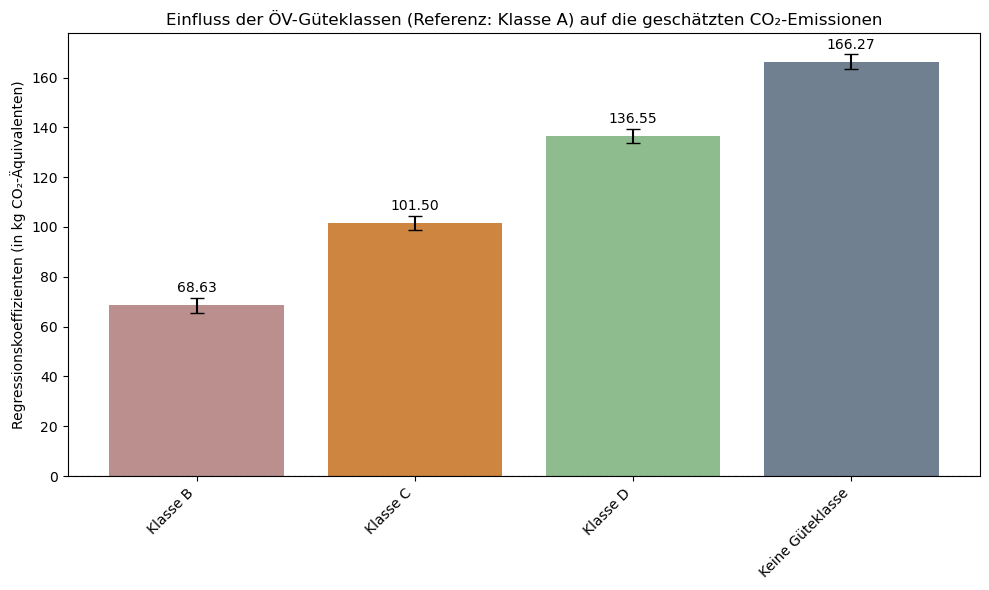

In [140]:
import matplotlib.pyplot as plt
import numpy as np

# Beispiel: Koeffizienten aus dem Basismodell
coefficients = model0.params[['HH_OEV_GUETEKLASSE_2', 'HH_OEV_GUETEKLASSE_3', 'HH_OEV_GUETEKLASSE_4', 'HH_OEV_GUETEKLASSE_5']]
errors = model0.bse[['HH_OEV_GUETEKLASSE_2', 'HH_OEV_GUETEKLASSE_3', 'HH_OEV_GUETEKLASSE_4', 'HH_OEV_GUETEKLASSE_5']]  # Standardfehler

# Achsenwerte
classes = ['Klasse B', 'Klasse C', 'Klasse D', 'Keine Güteklasse']
y_pos = np.arange(len(classes))

# Balkendiagramm erstellen
plt.figure(figsize=(10, 6))
bars = plt.bar(y_pos, coefficients, yerr=errors, capsize=5, color=['rosybrown', 'peru', 'darkseagreen', 'slategrey'])

# Werte in den Balken anzeigen
for bar, coeff in zip(bars, coefficients):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-Koordinate (Mitte des Balkens)
        height + 4,  # y-Koordinate (leicht oberhalb/unterhalb des Balkens)
        f'{coeff:.2f}',  # Formatierung der Werte
        ha='center', va='bottom' if height > 0 else 'top',  # Textausrichtung
        fontsize=10
    )

# Achsentitel und Beschriftungen
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Null-Linie
plt.xticks(y_pos, classes, rotation=45, ha="right")
plt.ylabel('Regressionskoeffizienten (in kg CO₂-Äquivalenten)')
plt.title('Einfluss der ÖV-Güteklassen (Referenz: Klasse A) auf die geschätzten CO₂-Emissionen')

# Diagramm anzeigen
plt.tight_layout()
plt.show()


In [141]:
# Residuen berechnen
residuals0 = model0.resid
fitted_values0 = model0.fittedvalues

Text(0, 0.5, 'Residuals')

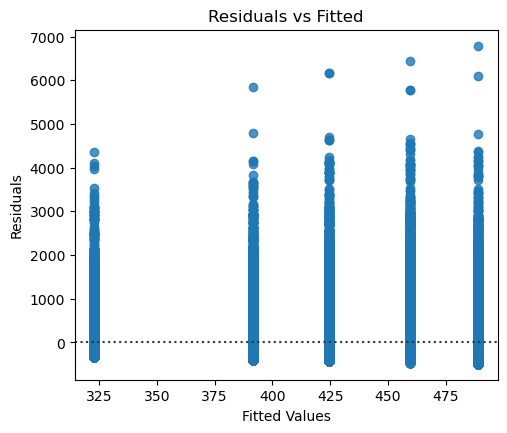

In [142]:
# Plot 1: Residuals vs Fitted
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.residplot(x=fitted_values0, y=residuals0, line_kws={'color': 'red', 'lw': 2})
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

Residuen vs. Angepasste Werte: Der ideale Residuen-Plot sollte kein Muster zeigen. Die Residuen sollten zufällig um den Nullpunkt verstreut sein. Muster deuten auf Probleme im Modell hin (wie Nichtlinearität oder Heteroskedastizität). Dieser Plot zeigt Muster auf, was auf Nichtlinearität oder Heteroskedastizität hindeutet.

In [143]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomielle Regression (2. Grades)
# Polynomial Features erstellen
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X0)

# Modell erstellen und fitten
quadratisches_modell = sm.OLS(y0, sm.add_constant(X_poly)).fit()
print(quadratisches_modell.summary())

                            OLS Regression Results                            
Dep. Variable:             CO2E_TOTAL   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     490.7
Date:                Mon, 30 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:00:36   Log-Likelihood:            -2.1354e+06
No. Observations:              286147   AIC:                         4.271e+06
Df Residuals:                  286138   BIC:                         4.271e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.681e+13   9.64e+13      0.382      0.7

c:\Users\livia\anaconda3\envs\DSCProjekt\Lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning:

divide by zero encountered in scalar divide



In [144]:
# Residuen berechnen
residuals_quadtratisch = quadratisches_modell.resid
fitted_values_quadtratisch = quadratisches_modell.fittedvalues

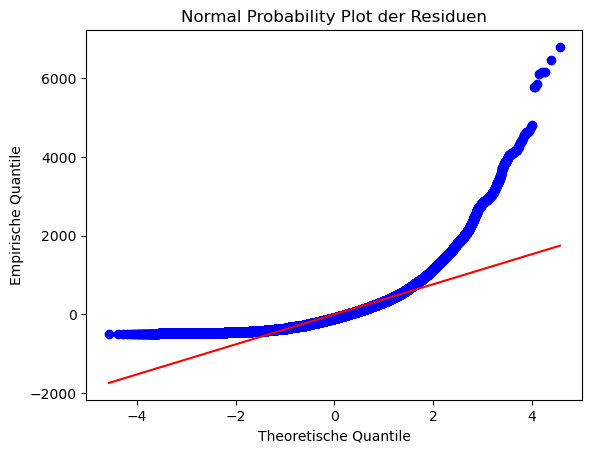

In [145]:
import scipy.stats as stats
stats.probplot(residuals_quadtratisch, dist="norm", plot=plt)
plt.title('Normal Probability Plot der Residuen')
plt.xlabel('Theoretische Quantile')
plt.ylabel('Empirische Quantile')
plt.show()

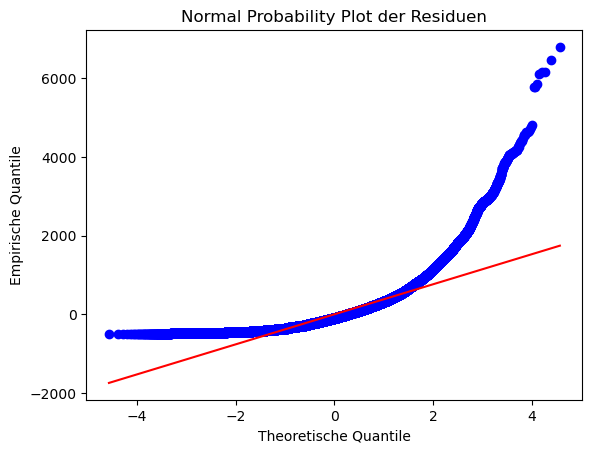

In [146]:
# Normal Probability Plot
import scipy.stats as stats

stats.probplot(residuals0, dist="norm", plot=plt)
plt.title('Normal Probability Plot der Residuen')
plt.xlabel('Theoretische Quantile')
plt.ylabel('Empirische Quantile')
plt.show()

Text(0.5, 1.0, 'Normal Q-Q')

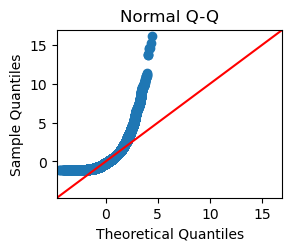

In [147]:
# Plot 2: QQ Plot (Quantile-Quantile plot)
plt.subplot(2, 2, 2)
sm.qqplot(residuals0, line='45', fit=True, ax=plt.gca())
plt.title('Normal Q-Q')

Ein QQ-Plot vergleicht die Verteilung der Residuen mit einer Normalverteilung. Wenn die Residuen normalverteilt sind, folgen sie der roten 45-Grad-Linie. Die Abweichung von der Linie deutet auf eine nicht Normalverteilung hin.

Text(0, 0.5, '√|Residuals|')

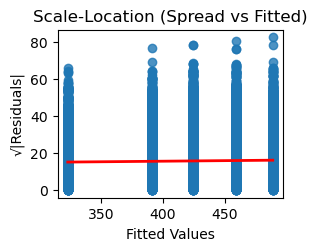

In [148]:
# Plot 3: Scale-Location (Residuals vs Fitted with sqrt of abs residuals)
plt.subplot(2, 2, 3)
sns.regplot(x=fitted_values0, y=np.sqrt(np.abs(residuals0)), scatter=True, line_kws={'color': 'red', 'lw': 2})
plt.title('Scale-Location (Spread vs Fitted)')
plt.xlabel('Fitted Values')
plt.ylabel('√|Residuals|')

Scale-Location-Plot (Streuung vs. Angepasste Werte): Dieser Plot zeigt die Quadratwurzel der absoluten Residuen gegen die angepassten Werte. Er überprüft auf Homoskedastizität (konstante Varianz). Wenn die rote Linie flach ist, haben die Residuen eine konstante Varianz. Ein fächerförmiges Muster deutet auf Heteroskedastizität hin.

In [149]:
# Um Verzerrungen zu reduzieren, wird eine Log-Transformation der Zielvariable durchgeführt

train['log_CO2E_TOTAL'] = np.log1p(train['CO2E_TOTAL'])
model0_log = sm.OLS(train['log_CO2E_TOTAL'], X0).fit()
print(model0_log.summary())


                            OLS Regression Results                            
Dep. Variable:         log_CO2E_TOTAL   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1982.
Date:                Mon, 30 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:01:33   Log-Likelihood:            -5.1209e+05
No. Observations:              286147   AIC:                         1.024e+06
Df Residuals:                  286142   BIC:                         1.024e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.8662 

Erklärte Varianz (R-squared):
Das R-squared hat sich auf 0.027 verbessert, was darauf hindeutet, dass das Modell jetzt 2,7 % der Varianz in der logarithmischen Zielvariablen erklärt. Das ist zwar eine Verbesserung, aber es zeigt immer noch, dass relevante Prädiktoren fehlen.

Signifikanz der Prädiktoren:

- Alle ÖV-Güteklassen sind weiterhin hoch signifikant (p < 0.001).

Die Koeffizienten interpretieren sich nun anders: Sie geben die prozentuale Änderung des CO₂-Ausstosses (in logarithmierter Form) für die jeweilige ÖV-Güteklasse relativ zur Referenzklasse an.

Koeffizienteninterpretation:

- HH_OEV_GUETEKLASSE_2: +34,55 %.
- HH_OEV_GUETEKLASSE_3: +51,75 %.
- HH_OEV_GUETEKLASSE_4: +69,09 %.
- HH_OEV_GUETEKLASSE_5: +79,64 %.
Dies zeigt, dass höhere ÖV-Güteklassen mit einem zunehmenden CO₂-Ausstoss assoziiert sind, was plausibel ist.

In [150]:
# Residuen berechnen
residuals0_log = model0_log.resid
fitted_values0_log = model0_log.fittedvalues

Text(0, 0.5, 'Residuals')

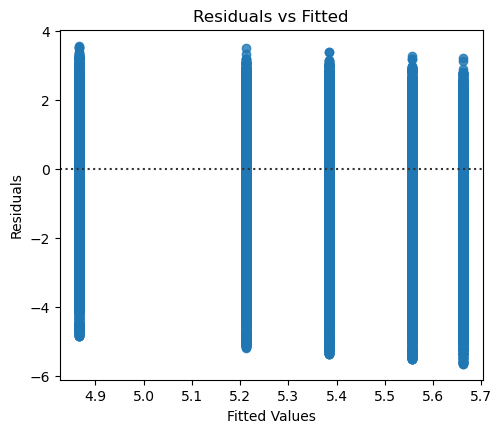

In [151]:
# Plot 1: Residuals vs Fitted
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.residplot(x=fitted_values0_log, y=residuals0_log, line_kws={'color': 'red', 'lw': 2})
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

Das Muster in den Residuen zeigt keine zufällige Verteilung um die Null-Linie. Die Vertikalität deutet darauf hin, dass die Residuen durch die diskrete Natur der ÖV-Güteklassen beeinflusst werden. Es könnten zusätzliche Prädiktoren fehlen, die die Zielvariable erklären, oder die Transformation könnte unzureichend sein.

Text(0.5, 1.0, 'Normal Q-Q')

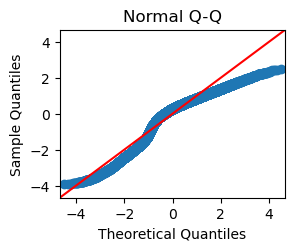

In [152]:
# Plot 2: QQ Plot (Quantile-Quantile plot)
plt.subplot(2, 2, 2)
sm.qqplot(residuals0_log, line='45', fit=True, ax=plt.gca())
plt.title('Normal Q-Q')

Der Q-Q-Plot zeigt deutliche Verbesserungen im Vergleich zu vorher. Die Punkte folgen nun weitgehend der roten Linie, insbesondere im mittleren Bereich. Dies deutet auf eine verbesserte Residuenverteilung hin.

Text(0, 0.5, '√|Residuals|')

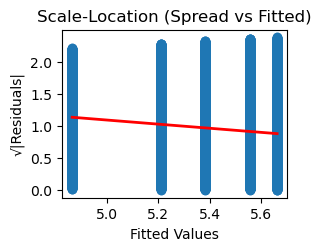

In [153]:
# Plot 3: Scale-Location (Residuals vs Fitted with sqrt of abs residuals)
plt.subplot(2, 2, 3)
sns.regplot(x=fitted_values0_log, y=np.sqrt(np.abs(residuals0_log)), scatter=True, line_kws={'color': 'red', 'lw': 2})
plt.title('Scale-Location (Spread vs Fitted)')
plt.xlabel('Fitted Values')
plt.ylabel('√|Residuals|')

Die rote Linie (√|Residuen|) ist nicht horizontal, sondern leicht geneigt. Dies zeigt, dass Heteroskedastizität weiterhin ein Problem ist. Die Varianz der Residuen ändert sich abhängig von den Fitted Values.

In [154]:
import statsmodels.api as sm

# Es wird ein robuster Standardfehler verwendet, um Verzerrungen durch Heteroskedastizität zu reduzieren:
model0_log_HC3 = sm.OLS(train['log_CO2E_TOTAL'], X0).fit(cov_type='HC3')
print(model0_log_HC3.summary())


                            OLS Regression Results                            
Dep. Variable:         log_CO2E_TOTAL   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1804.
Date:                Mon, 30 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:02:19   Log-Likelihood:            -5.1209e+05
No. Observations:              286147   AIC:                         1.024e+06
Df Residuals:                  286142   BIC:                         1.024e+06
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.8662 

In [155]:

# Residuen berechnen
residuals0_log_HC3 = model0_log_HC3.resid
fitted_values0_log_HC3 = model0_log_HC3.fittedvalues

Text(0, 0.5, 'Residuals')

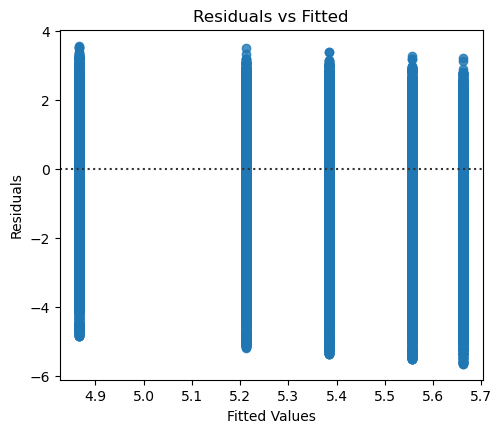

In [156]:
# Plot 1: Residuals vs Fitted
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.residplot(x=fitted_values0_log_HC3, y=residuals0_log_HC3, line_kws={'color': 'red', 'lw': 2})
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

Text(0.5, 1.0, 'Normal Q-Q')

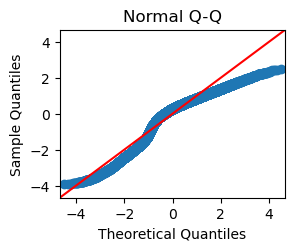

In [157]:
# Plot 2: QQ Plot (Quantile-Quantile plot)
plt.subplot(2, 2, 2)
sm.qqplot(residuals0_log_HC3, line='45', fit=True, ax=plt.gca())
plt.title('Normal Q-Q')

Text(0, 0.5, '√|Residuals|')

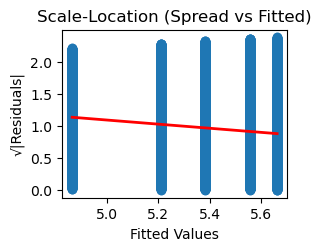

In [158]:
# Plot 3: Scale-Location (Residuals vs Fitted with sqrt of abs residuals)
plt.subplot(2, 2, 3)
sns.regplot(x=fitted_values0_log_HC3, y=np.sqrt(np.abs(residuals0_log_HC3)), scatter=True, line_kws={'color': 'red', 'lw': 2})
plt.title('Scale-Location (Spread vs Fitted)')
plt.xlabel('Fitted Values')
plt.ylabel('√|Residuals|')

Das Problem, dass die Zielvariable CO2_TOTAL bereits die Emissionen pro Fahrzeugart enthält, könnte die Residuen beeinflussen und die Modellierung erschweren. Dies liegt daran, dass ein wesentlicher Teil der Variation in CO2_TOTAL bereits durch die enthaltenen Emissionsdaten erklärt wird. Dies kann dazu führen, dass die ÖV-Güteklassen oder andere Prädiktoren weniger Einfluss zeigen.

### Lineare Regression (Geschlecht, Alter)

In [159]:
# Parameter für die Regression
X = train[['ZP_ALTER', 'ZP_GESL_2']]
X = sm.add_constant(X)
y = train['CO2E_TOTAL']

In [160]:
# OLS Modell fitten
model = sm.OLS(y, X).fit()

# Modell summary ausgeben
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             CO2E_TOTAL   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     196.6
Date:                Mon, 30 Dec 2024   Prob (F-statistic):           4.70e-86
Time:                        19:03:03   Log-Likelihood:            -2.1372e+06
No. Observations:              286147   AIC:                         4.274e+06
Df Residuals:                  286144   BIC:                         4.274e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        421.3853      2.659    158.448      0.0

Interpretation:
- Wenn alle Prädiktoren (Alter und Geschlecht) gleich 0 sind, beträgt der durchschnittliche CO₂-Ausstoss etwa 421.38. Das ist der Basiswert des Modells.
- Pro Jahr zusätzlichem Alter steigt der CO₂-Ausstoss im Durchschnitt um 0,38 kg.
- Frauen haben im Vergleich zu Männern durchschnittlich 28,94 kg weniger CO₂-Ausstoss.

### Lineare Regression (Geschlecht, Alter, ÖV-Güteklasse)

In [161]:
# Parameter übergeben
X2 = train[['ZP_ALTER', 'ZP_GESL_2', 'HH_OEV_GUETEKLASSE_2', 'HH_OEV_GUETEKLASSE_3', 'HH_OEV_GUETEKLASSE_4', 'HH_OEV_GUETEKLASSE_5']]
X2 = sm.add_constant(X2)
y2 = train['CO2E_TOTAL']

In [162]:
np.asarray(X2)

array([[ 1., 70.,  0., ...,  1.,  0.,  0.],
       [ 1., 78.,  1., ...,  0.,  0.,  0.],
       [ 1., 49.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 1., 33.,  0., ...,  0.,  0.,  0.],
       [ 1., 65.,  0., ...,  0.,  0.,  0.],
       [ 1., 56.,  1., ...,  0.,  0.,  0.]])

In [163]:
np.asarray(y2)

array([ 261.52553682,    3.74406179, 1137.42467901, ...,  441.93320636,
          1.68768593,  203.56873512])

In [164]:
# Modell fitten
model2 = sm.OLS(y2, X2).fit()

# Zusammenfassung des Modells anzeigen
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:             CO2E_TOTAL   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     711.4
Date:                Mon, 30 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:03:03   Log-Likelihood:            -2.1353e+06
No. Observations:              286147   AIC:                         4.271e+06
Df Residuals:                  286140   BIC:                         4.271e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  322.8867 

### Bedeutung der Güteklassen:

- -97	Keine Angabe / Fehlende Geodaten
- 1	Klasse A: Sehr gute Erschliessung
- 2	Klasse B: Gute Erschliessung
- 3	Klasse C: Mittelmässige Erschliessung
- 4	Klasse D: Geringe Erschliessung
- 5	Keine Güteklasse: Marginale oder keine ÖV-Erschliessung

### Interpretation:

Die Koeffizienten geben an, wie sich der CO₂-Ausstoss ändert, wenn Haushalte in unterschiedlichen ÖV-Gütekategorien leben, im Vergleich zur Referenzkategorie (Klasse A: Sehr gute Erschliessung):

- Klasse B (Gute Erschliessung): + 69.06 kg
Haushalte mit guter ÖV-Erschliessung emittieren im Durchschnitt 69,06 kg mehr CO₂ als Haushalte mit sehr guter ÖV-Erschliessung.

- Klasse C (Mittelmässige Erschliessung): +100.62 kg
Der CO₂-Ausstoss steigt weiter, wenn die ÖV-Erschliessung nur mittelmässig ist.

- Klasse D (Geringe Erschliessung): +135.54 kg
Mit schlechter ÖV-Erschliessung steigt der CO₂-Ausstoss erheblich.

- Klasse E (Marginale/Keine Erschliessung): +165.61 kg

Die höchsten CO₂-Emissionen treten in Regionen auf, die kaum oder gar nicht an den öffentlichen Verkehr angebunden sind.


### Residuen Analyse

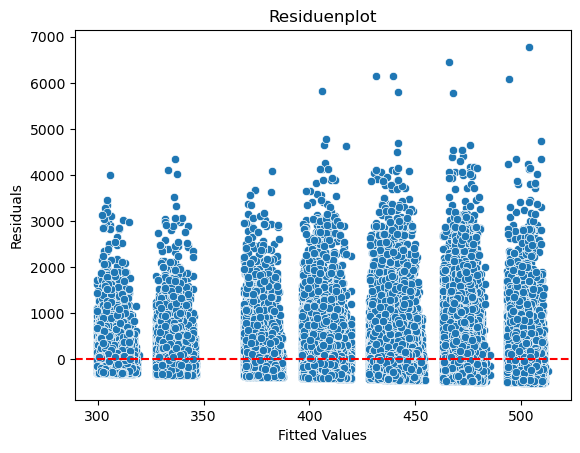

In [165]:
# Residuen berechnen
residuals = model2.resid
fitted_values = model2.fittedvalues

# Residuenplot
sns.scatterplot(x=model2.fittedvalues, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuenplot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

Es bilden sich weiterhin Cluster, was darauf hindeutet dass nicht alle Gruppen oder Kategorien berücksichtigt worden sind.

Text(0.5, 1.0, 'Normal Q-Q')

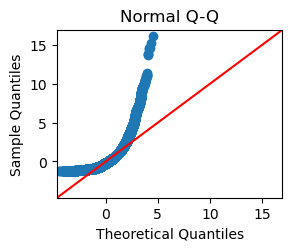

In [166]:
# Plot 2: QQ Plot (Quantile-Quantile plot)
plt.subplot(2, 2, 2)
sm.qqplot(residuals, line='45', fit=True, ax=plt.gca())
plt.title('Normal Q-Q')

Interpretation: 

Auch bei diesem Modell sind die Resiuden nicht gleichverteilt um 0 und somit nicht normalverteilt. Obwohl weitere Parameter hinzugefügt werden, wird das Modell nicht besser. 

### Lineare Regression (Geschlecht, Alter, ÖV-Güteklasse, Haushaltseinkommen)

In [167]:
# Hinzunahme weiterer Variablen
X3 = train[['ZP_ALTER', 'HH_HAUSHALTSEINKOMMEN_2', 'HH_HAUSHALTSEINKOMMEN_3', 'HH_HAUSHALTSEINKOMMEN_4', 'HH_HAUSHALTSEINKOMMEN_5', 'HH_HAUSHALTSEINKOMMEN_6', 'HH_HAUSHALTSEINKOMMEN_7',
                    'HH_HAUSHALTSEINKOMMEN_8', 'HH_HAUSHALTSEINKOMMEN_9', 'HH_OEV_GUETEKLASSE_2', 'HH_OEV_GUETEKLASSE_3', 'HH_OEV_GUETEKLASSE_4', 'HH_OEV_GUETEKLASSE_5']]
X3 = sm.add_constant(X3)
y3 = train['CO2E_TOTAL']

In [168]:
# Modell anpassen
model3 = sm.OLS(y3, X3).fit()

# Zusammenfassung des Modells anzeigen
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:             CO2E_TOTAL   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     324.3
Date:                Mon, 30 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:03:08   Log-Likelihood:            -2.1353e+06
No. Observations:              286147   AIC:                         4.271e+06
Df Residuals:                  286133   BIC:                         4.271e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Bedeutung der Kategorien:

- 1	Unter CHF 2000
- 2	CHF 2000 bis 4000
- 3	CHF 4001 bis 6000
- 4	CHF 6001 bis 8000
- 5	CHF 8001 bis 10000
- 6	CHF 10001 bis 12000
- 7	CHF 12001 bis 14000
- 8	CHF 14001 bis 16000
- 9	Mehr als CHF 16000

### Interpretation
- Einkommensstufen (2 bis 7): Mit steigendem Einkommen wächst der CO₂-Ausstoss (Ausreisser bei Einkommen 4001 bis 6000)
- Einkommensstufen (8 und 9): Bei hohem Einkommen sinkt der CO₂-Ausstoss wieder

Beispiel:
- CHF 2000-4000 (+25.53 kg)
- CHF 4001-6000 (+61.84 kg)
- CHF 6001-8000 (+49.79 kg)
- Höchste Kategorie (>16000): +35.97 kg

Der signifikante Anstieg des CO₂-Ausstosses bei mittleren und hohen Einkommen könnte darauf hindeuten, dass wohlhabendere Haushalte häufiger CO₂-intensive Verkehrsmittel wie Autos oder Flugzeuge nutzen. Bei sehr hohem Einkommen nimmt der CO2-Ausstoss anschliessend ab.

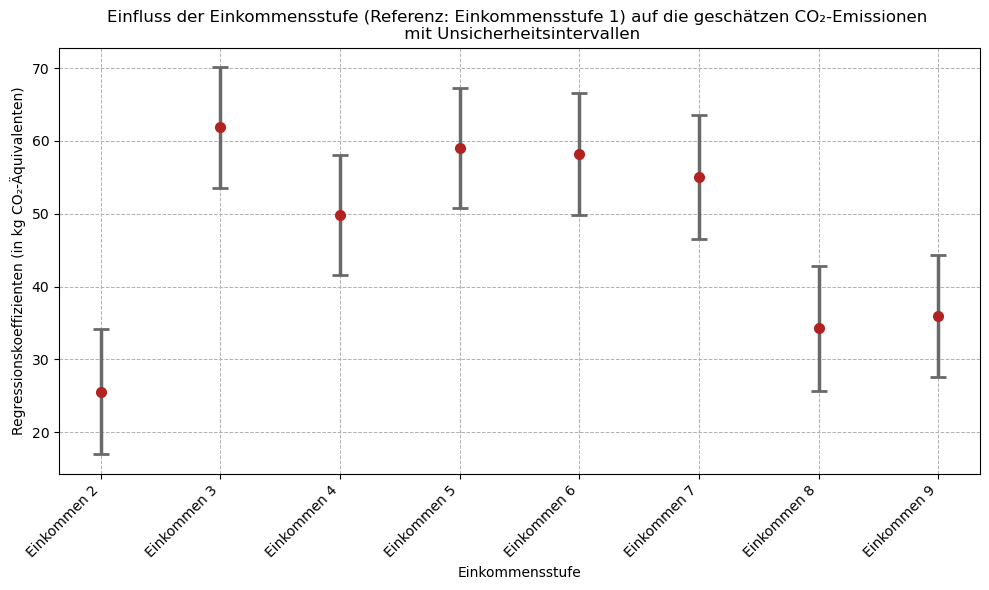

In [169]:
# Koeffizienten und Standardfehler extrahieren
coefficients = model3.params[['HH_HAUSHALTSEINKOMMEN_2', 'HH_HAUSHALTSEINKOMMEN_3', 'HH_HAUSHALTSEINKOMMEN_4',
                              'HH_HAUSHALTSEINKOMMEN_5', 'HH_HAUSHALTSEINKOMMEN_6', 'HH_HAUSHALTSEINKOMMEN_7',
                              'HH_HAUSHALTSEINKOMMEN_8', 'HH_HAUSHALTSEINKOMMEN_9']]
errors = model3.bse[['HH_HAUSHALTSEINKOMMEN_2', 'HH_HAUSHALTSEINKOMMEN_3', 'HH_HAUSHALTSEINKOMMEN_4',
                     'HH_HAUSHALTSEINKOMMEN_5', 'HH_HAUSHALTSEINKOMMEN_6', 'HH_HAUSHALTSEINKOMMEN_7',
                     'HH_HAUSHALTSEINKOMMEN_8', 'HH_HAUSHALTSEINKOMMEN_9']]

# Namen der Einkommensklassen
income_classes = ['Einkommen 2', 'Einkommen 3', 'Einkommen 4', 'Einkommen 5',
                  'Einkommen 6', 'Einkommen 7', 'Einkommen 8', 'Einkommen 9']
x_pos = np.arange(len(income_classes))

# Diagramm erstellen
plt.figure(figsize=(10, 6))
plt.errorbar(x_pos, coefficients, yerr=errors, fmt='o', color='firebrick', ecolor='dimgrey', elinewidth=2.5, capsize=6, capthick=2, markersize=7)

# Achsentitel und Beschriftungen
plt.xticks(x_pos, income_classes, rotation=45, ha="right", fontsize=10)
plt.ylabel('Regressionskoeffizienten (in kg CO₂-Äquivalenten)')
plt.title('Einfluss der Einkommensstufe (Referenz: Einkommensstufe 1) auf die geschätzen CO₂-Emissionen \n mit Unsicherheitsintervallen')
plt.xlabel('Einkommensstufe')

# Gitternetzlinien hinzufügen
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# Layout anpassen und anzeigen
plt.tight_layout()
plt.show()


### Residuenanalyse 

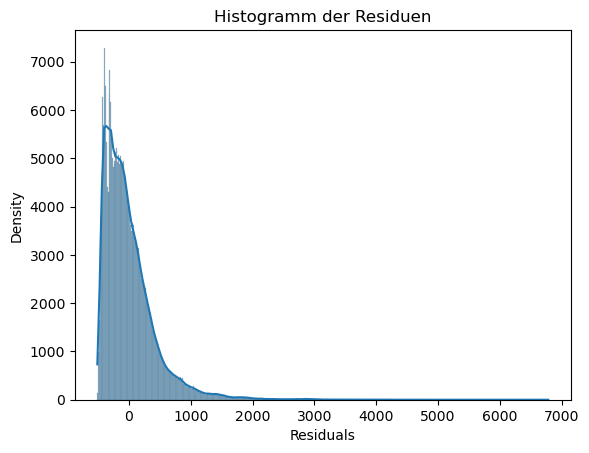

Text(0, 0.5, 'Residuals')

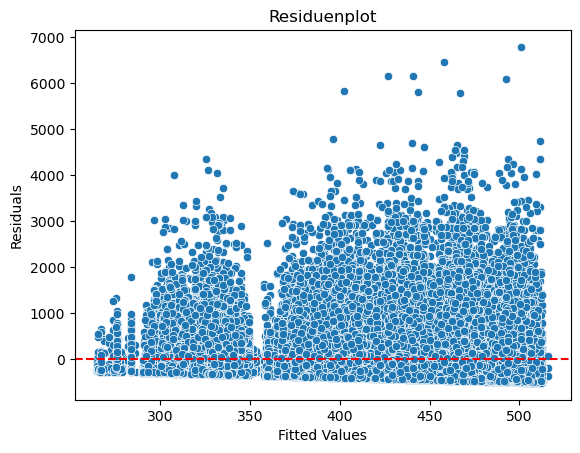

In [170]:
residuals3 = model3.resid

# Histogramm der Residuen
sns.histplot(residuals3, kde=True)
plt.title('Histogramm der Residuen')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

# Residuenplot
sns.scatterplot(x=model3.fittedvalues, y=residuals3)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuenplot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

- Der Residuenplot zeigt eine ungleichmässige Streuung der Residuen, was auf Heteroskedastizität hindeutet und darauf, dass das Modell nicht optimal skaliert. 
- Zudem sind mehrere Cluster entlang der Fitted Values sichtbar, welche zwar im Vergleich zum weniger komplexen Modell geringer worden sind. Dies deutet jedoch weiterhin auf mögliche mögliche Kategorien oder Gruppen in den Daten hin, welche das Modell nicht vollständig berücksichtigt. 
- Einige Ausreisser mit sehr hohen Residuen könnten ebenfalls die Modellgüte beeinflussen. 
- Insgesamt kann das Modell nur einen kleinen Teil der Varianz erklären und es besteht Optimierungspotenzial.

### ANOVA (Analysis of Variance)

In [171]:
import statsmodels.stats.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

# Formelbasierte Spezifikation des Modells
model4 = smf.ols('CO2E_TOTAL ~ ZP_ALTER + HH_HAUSHALTSEINKOMMEN_2 + HH_HAUSHALTSEINKOMMEN_3 + HH_HAUSHALTSEINKOMMEN_4 + HH_HAUSHALTSEINKOMMEN_5 + HH_HAUSHALTSEINKOMMEN_6 + HH_HAUSHALTSEINKOMMEN_7 + HH_HAUSHALTSEINKOMMEN_8 + HH_HAUSHALTSEINKOMMEN_9 + HH_OEV_GUETEKLASSE_2 + HH_OEV_GUETEKLASSE_3 + HH_OEV_GUETEKLASSE_4 + HH_OEV_GUETEKLASSE_5', data=train).fit()

# Anova durchführen
anova_table = anova_lm(model4)

# Anova Tabelle anzeigen
print(anova_table)


                               df        sum_sq       mean_sq            F  \
ZP_ALTER                      1.0  1.192731e+07  1.192731e+07    67.198629   
HH_HAUSHALTSEINKOMMEN_2       1.0  1.852711e+07  1.852711e+07   104.381971   
HH_HAUSHALTSEINKOMMEN_3       1.0  2.518860e+06  2.518860e+06    14.191291   
HH_HAUSHALTSEINKOMMEN_4       1.0  8.451737e+05  8.451737e+05     4.761720   
HH_HAUSHALTSEINKOMMEN_5       1.0  7.820621e+06  7.820621e+06    44.061481   
HH_HAUSHALTSEINKOMMEN_6       1.0  8.555583e+06  8.555583e+06    48.202269   
HH_HAUSHALTSEINKOMMEN_7       1.0  1.144710e+07  1.144710e+07    64.493117   
HH_HAUSHALTSEINKOMMEN_8       1.0  1.442879e+05  1.442879e+05     0.812920   
HH_HAUSHALTSEINKOMMEN_9       1.0  4.883214e+06  4.883214e+06    27.512094   
HH_OEV_GUETEKLASSE_2          1.0  7.346912e+07  7.346912e+07   413.925972   
HH_OEV_GUETEKLASSE_3          1.0  1.280601e+07  1.280601e+07    72.149249   
HH_OEV_GUETEKLASSE_4          1.0  5.920411e+07  5.920411e+07   

- Die Emissionen hängen in komplexer Weise mit den Einkommen zusammen, wobei einige Kategorien stärkere Effekte haben.
- Qualität des öffentlichen Verkehrs hat einen starken Einfluss auf die Emissionen, wobei höhere Güteklassen stärker assoziiert sind z.B. :
    - HH_OEV_GUETEKLASSE_2 (F = 413.93, p < 0.001).
    - HH_OEV_GUETEKLASSE_5 zeigt den stärksten Effekt (F = 3021.15, p < 0.001).

Die stärksten Effekte wurden für die Güteklassen des öffentlichen Verkehrs und einige Einkommenskategorien gefunden. Diese sollten im Modell berücksichtigt bleiben. Der hohe Residualwert deutet darauf hin, dass ein grosser Teil der Varianz nicht durch die aktuellen Variablen erklärt wird.

In [172]:
# Gesamt Sum of Squares
total_ss = anova_table['sum_sq'].sum()

# Modell Sum of Squares
modell_ss = anova_table['sum_sq'][:-1].sum() # letzte Zeile ausschliessen

# Residual Sum of Squares
residual_ss = anova_table.loc['Residual']['sum_sq'] # Residual Zeile

# R^2 berechnen
r_squared = modell_ss / total_ss

# Ausgabe der Werte
print(f"Total Sum of Squares: {total_ss}")
print(f"Model Sum of Squares: {modell_ss}")
print(f"Residual Sum of Squares: {residual_ss}")
print(f"R^2: {r_squared}")

Total Sum of Squares: 51535093678.970375
Model Sum of Squares: 748382840.4526197
Residual Sum of Squares: 50786710838.51775
R^2: 0.014521810033266863


Das Verhältnis zwischen der Sum of Squares des Modells und dem Residual Sum of Squares Fall deutet darauf hin, dass das Modell wenig erklärende Kraft hat. Es ist jedoch zu berücksichtigen, dass der Parameter CO2E_TOTAL bereits einige erklärbare Faktoren, wie beispielsweise die Fahrzeugart, beinhaltet.

## 4. Szenarien

Ausgehend von der aktuellen Haushaltsverteilung auf diesen Güteklassen wird ein stufenwei-ser Übergang simuliert, bei dem jeweils x% (wobei x = 5, 10 und 20) der Haushalte einer Güteklasse in die nächsthöhere Klasse wechseln. Die Umverteilung wird wie folgt vorgenom-men:
1.	Keine Güteklasse → Klasse D: x% der marginal erschlossenen Haushalte erhalten eine geringe Erschliessung (Klasse D).
2.	Klasse D → Klasse C: x% der gering erschlossenen Haushalte verbessern sich zu einer mittelmässigen Erschliessung (Klasse C).
3.	Klasse C → Klasse B: x% der mittelmässig erschlossenen Haushalte wechseln in die Kategorie guter Erschliessung (Klasse B).

Es erfolgt keine Umverteilung von der Klasse B in die Klasse A, da die Klasse a weiterhin unsere Referenzkategorie ist.

In [173]:
szenario_gueteklasse = gdf[['CO2E_TOTAL', 'HH_OEV_GUETEKLASSE', 'geometry']]

# Datensatz bereinigen: Nur Zeilen mit nicht-leeren Werten in den relevanten Spalten
szenario_gueteklasse = szenario_gueteklasse.dropna()

szenario_gueteklasse.head()

,CO2E_TOTAL,HH_OEV_GUETEKLASSE,geometry
0,83.010354,3,"LINESTRING Z (2532653.357 1155702.624 420.558,..."
1,61.705018,3,"LINESTRING Z (2532933.573 1155665.561 430.418,..."
2,117.490869,3,"LINESTRING Z (2533071.108 1155894.339 430.657,..."
3,320.444438,3,MULTILINESTRING Z ((2532653.357 1155702.624 41...
4,490.113940,3,"LINESTRING Z (2532957.334 1156871.023 475.614,..."


In [174]:
szenario_gueteklasse.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 473372 entries, 0 to 552621
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   CO2E_TOTAL          473372 non-null  float64 
 1   HH_OEV_GUETEKLASSE  473372 non-null  int64   
 2   geometry            473372 non-null  geometry
dtypes: float64(1), geometry(1), int64(1)
memory usage: 14.4 MB


In [175]:
def redistribute_households_on_raw_data(szenario_gueteklasse, x_percent):
    """
    Verteilt x% der Haushalte in die nächste höhere ÖV-Güteklasse basierend auf rohen Haushaltszahlen.
    """
    x_factor = x_percent / 100

    # Verlagerung: Keine → Klasse D
    num_to_shift = int(szenario_gueteklasse[szenario_gueteklasse['HH_OEV_GUETEKLASSE'] == 5].shape[0] * x_factor)
    indices_to_shift = szenario_gueteklasse[szenario_gueteklasse['HH_OEV_GUETEKLASSE'] == 5].sample(num_to_shift).index
    szenario_gueteklasse.loc[indices_to_shift, 'HH_OEV_GUETEKLASSE'] = 4

    # Verlagerung: Klasse D → Klasse C
    num_to_shift = int(szenario_gueteklasse[szenario_gueteklasse['HH_OEV_GUETEKLASSE'] == 4].shape[0] * x_factor)
    indices_to_shift = szenario_gueteklasse[szenario_gueteklasse['HH_OEV_GUETEKLASSE'] == 4].sample(num_to_shift).index
    szenario_gueteklasse.loc[indices_to_shift, 'HH_OEV_GUETEKLASSE'] = 3

    # Verlagerung: Klasse C → Klasse B
    num_to_shift = int(szenario_gueteklasse[szenario_gueteklasse['HH_OEV_GUETEKLASSE'] == 3].shape[0] * x_factor)
    indices_to_shift = szenario_gueteklasse[szenario_gueteklasse['HH_OEV_GUETEKLASSE'] == 3].sample(num_to_shift).index
    szenario_gueteklasse.loc[indices_to_shift, 'HH_OEV_GUETEKLASSE'] = 2

    return szenario_gueteklasse


In [176]:
# Prozentsatz der Emissionsreduktionen
def calculate_emission_reduction(coef_better_class, coef_worse_class):
    """
    Berechnet die prozentuale Reduktion der Emissionen zwischen zwei Klassen.
    """
    return (coef_worse_class - coef_better_class) / coef_worse_class * 100

# Berechnung der Emissionsreduktion zwischen den Klassen
reduction_5_to_4 = calculate_emission_reduction(model0.params['HH_OEV_GUETEKLASSE_4'], model0.params['HH_OEV_GUETEKLASSE_5'])  # Klasse 4 → Klasse 5
reduction_4_to_3 = calculate_emission_reduction(model0.params['HH_OEV_GUETEKLASSE_3'], model0.params['HH_OEV_GUETEKLASSE_4'])  # Klasse 3 → Klasse 4
reduction_3_to_2 = calculate_emission_reduction(model0.params['HH_OEV_GUETEKLASSE_2'], model0.params['HH_OEV_GUETEKLASSE_3'])  # Klasse 2 → Klasse 3

print(f"Prozentuale Reduktion 5 → 4: {reduction_5_to_4:.2f}%")
print(f"Prozentuale Reduktion 4 → 3: {reduction_4_to_3:.2f}%")
print(f"Prozentuale Reduktion 3 → 2: {reduction_3_to_2:.2f}%")

Prozentuale Reduktion 5 → 4: 17.87%
Prozentuale Reduktion 4 → 3: 25.67%
Prozentuale Reduktion 3 → 2: 32.38%


In [177]:
szenario_gueteklasse.head()

,CO2E_TOTAL,HH_OEV_GUETEKLASSE,geometry
0,83.010354,3,"LINESTRING Z (2532653.357 1155702.624 420.558,..."
1,61.705018,3,"LINESTRING Z (2532933.573 1155665.561 430.418,..."
2,117.490869,3,"LINESTRING Z (2533071.108 1155894.339 430.657,..."
3,320.444438,3,MULTILINESTRING Z ((2532653.357 1155702.624 41...
4,490.113940,3,"LINESTRING Z (2532957.334 1156871.023 475.614,..."


In [179]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Dictionary für die Modelle und Liste für die Emissionsreduktionen
modelle_szenarien = {}
total_reductions = []

# Für jedes Umverteilungsszenario (5%, 10%, 15%)
for x in [5, 10, 15]:
    
    # Zuerst die rohen Haushaltszahlen extrahieren
    raw_household_data = szenario_gueteklasse[['CO2E_TOTAL', 'HH_OEV_GUETEKLASSE']].copy()

    # Daten umverteilen (auf den rohen Haushaltszahlen)
    redistributed_data = redistribute_households_on_raw_data(raw_household_data, x)

    # Jetzt die Dummy-Variablen auf den umverteilten Haushaltszahlen erstellen
    redistributed_data = pd.get_dummies(redistributed_data, columns=['HH_OEV_GUETEKLASSE'], drop_first=True)
    redistributed_data['HH_OEV_GUETEKLASSE_2'] = redistributed_data['HH_OEV_GUETEKLASSE_2'].astype(int)
    redistributed_data['HH_OEV_GUETEKLASSE_3'] = redistributed_data['HH_OEV_GUETEKLASSE_3'].astype(int)
    redistributed_data['HH_OEV_GUETEKLASSE_4'] = redistributed_data['HH_OEV_GUETEKLASSE_4'].astype(int)
    redistributed_data['HH_OEV_GUETEKLASSE_5'] = redistributed_data['HH_OEV_GUETEKLASSE_5'].astype(int)

    # Berechnung der Emissionsreduktion als Veränderung in den erklärenden Variablen
    reduction_5_to_4 = calculate_emission_reduction(
        model0.params['HH_OEV_GUETEKLASSE_4'], 
        model0.params['HH_OEV_GUETEKLASSE_5']
    )
    reduction_4_to_3 = calculate_emission_reduction(
        model0.params['HH_OEV_GUETEKLASSE_3'], 
        model0.params['HH_OEV_GUETEKLASSE_4']
    )
    reduction_3_to_2 = calculate_emission_reduction(
        model0.params['HH_OEV_GUETEKLASSE_2'], 
        model0.params['HH_OEV_GUETEKLASSE_3']
    )

    redistributed_data['CO2E_TOTAL'] -= (
        redistributed_data['HH_OEV_GUETEKLASSE_5'] * reduction_5_to_4 +  
        redistributed_data['HH_OEV_GUETEKLASSE_4'] * reduction_4_to_3 +  
        redistributed_data['HH_OEV_GUETEKLASSE_3'] * reduction_3_to_2    
    )

    # Berechnung der Gesamt-Emissionsreduktion
    total_reduction = (
        redistributed_data['HH_OEV_GUETEKLASSE_5'] * reduction_5_to_4 +
        redistributed_data['HH_OEV_GUETEKLASSE_4'] * reduction_4_to_3 +
        redistributed_data['HH_OEV_GUETEKLASSE_3'] * reduction_3_to_2
    ).sum()

    # Speichern der Gesamt-Emissionsreduktion für das Szenario
    total_reductions.append((x, total_reduction))

    # Parameter für die Regression
    X_szenario = redistributed_data[['HH_OEV_GUETEKLASSE_2', 'HH_OEV_GUETEKLASSE_3', 'HH_OEV_GUETEKLASSE_4', 'HH_OEV_GUETEKLASSE_5']]
    X_szenario = add_constant(X_szenario)
    y_szenario = redistributed_data['CO2E_TOTAL']

    # Modell erstellen
    model_szenario = sm.OLS(y_szenario, X_szenario).fit()
    modelle_szenarien[f'{x}%'] = model_szenario

# Ausgabe der Gesamt-Emissionsreduktionen
umverteilung = [x[0] for x in total_reductions]
emissions_reduktion = [x[1] / 1000 for x in total_reductions]  # in Tonnen umrechnen

# Balkendiagramm erstellen
fig = go.Figure()

fig.add_trace(go.Bar(
    x=umverteilung,
    y=emissions_reduktion,
    text=[f'{val:,.2f}' for val in emissions_reduktion],  # Betrag im Balken anzeigen
    textposition='auto',
    marker_color=['#CBD5BB', '#D9CFC3', '#C9D4DD'],
    error_y=dict(
        type='data',
        visible=True
    )
))

# Achsentitel und Beschriftungen
fig.update_layout(
    title='Gesamt-Emissionsreduktion bei verschiedenen Umverteilungsstufen',
    xaxis_title='Umverteilung der Haushalte (%)',
    yaxis_title='Gesamt-Emissionsreduktion (CO2E) in Tonnen',
    xaxis=dict(tickmode='array', tickvals=umverteilung),
    yaxis=dict(tickformat=',d'),
    template='plotly_white'
)

fig.show()

# Ausgabe der Modellzusammenfassungen für jedes Szenario
for x, model in modelle_szenarien.items():
    print(f"Modell für {x} Umverteilung:")
    print(model.summary())
    print("\n")

Modell für 5% Umverteilung:
                            OLS Regression Results                            
Dep. Variable:             CO2E_TOTAL   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1150.
Date:                Mon, 30 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:05:58   Log-Likelihood:            -3.5322e+06
No. Observations:              473372   AIC:                         7.064e+06
Df Residuals:                  473367   BIC:                         7.064e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
cons

In [180]:
redistributed_data.head()

,CO2E_TOTAL,HH_OEV_GUETEKLASSE_2,HH_OEV_GUETEKLASSE_3,HH_OEV_GUETEKLASSE_4,HH_OEV_GUETEKLASSE_5
0,50.626341,0,1,0,0
1,29.321005,0,1,0,0
2,85.106856,0,1,0,0
3,288.060425,0,1,0,0
4,457.729927,0,1,0,0


In [181]:
redistributed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 473372 entries, 0 to 552621
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   CO2E_TOTAL            473372 non-null  float64
 1   HH_OEV_GUETEKLASSE_2  473372 non-null  int32  
 2   HH_OEV_GUETEKLASSE_3  473372 non-null  int32  
 3   HH_OEV_GUETEKLASSE_4  473372 non-null  int32  
 4   HH_OEV_GUETEKLASSE_5  473372 non-null  int32  
dtypes: float64(1), int32(4)
memory usage: 30.6 MB


In [182]:
modelle_szenarien.keys()

dict_keys(['5%', '10%', '15%'])

In [183]:
total_reductions

[(5, 8730746.85834777), (10, 8578069.994708791), (15, 8402423.959398666)]

C:\Users\livia\AppData\Local\Temp\ipykernel_25652\173411440.py:52: UserWarning:

You have mixed positional and keyword arguments, some input may be discarded.



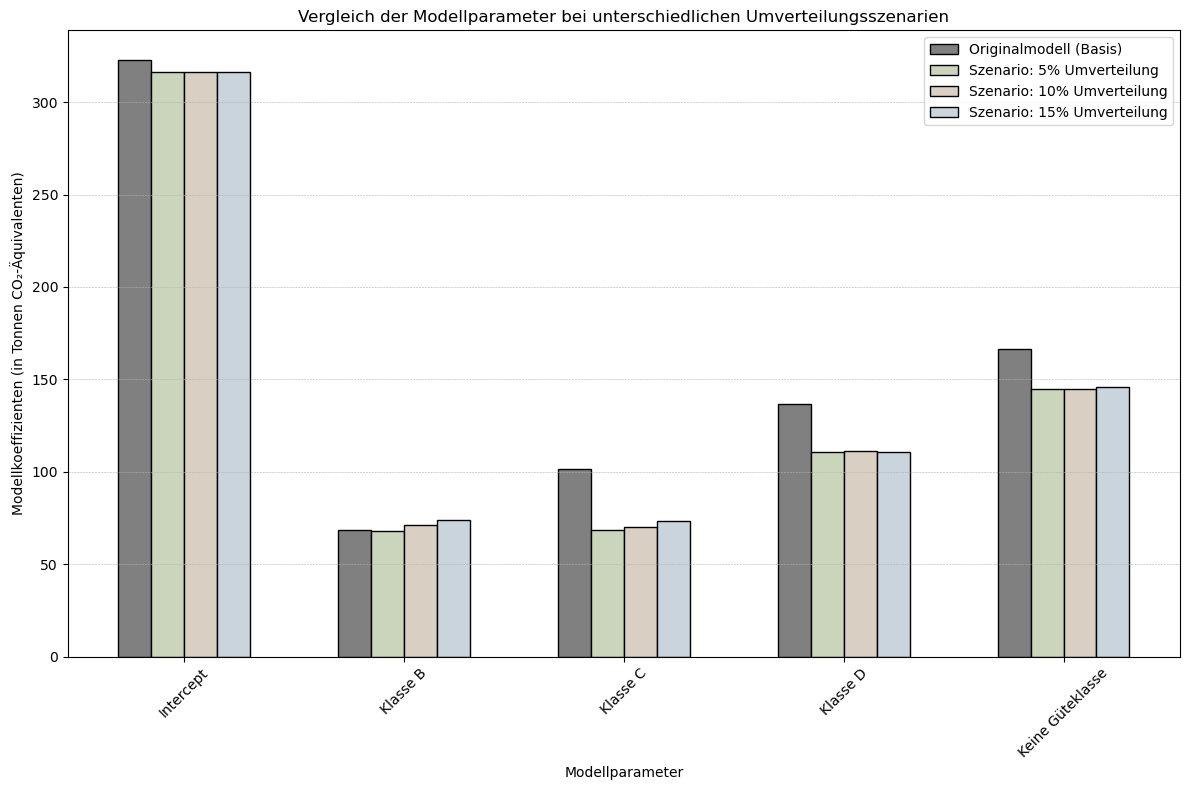

In [184]:
# Dictionary der Modelle
modelle = {
    'model0': model0,
    '5% Umverteilung': modelle_szenarien['5%'],
    '10% Umverteilung': modelle_szenarien['10%'],
    '15% Umverteilung': modelle_szenarien['15%']
}

# Parameter, die geplottet werden sollen
parameter = ['const', 'HH_OEV_GUETEKLASSE_2', 'HH_OEV_GUETEKLASSE_3', 'HH_OEV_GUETEKLASSE_4', 'HH_OEV_GUETEKLASSE_5']
parameter_labels = ['Intercept', 'Klasse B', 'Klasse C', 'Klasse D', 'Keine Güteklasse']

# Koeffizienten der Modelle extrahieren
coefficients = {name: model.params for name, model in modelle.items()}

fig, ax = plt.subplots(figsize=(12, 8))

# Balkenbreite und Position der Balken auf der x-Achse
bar_width = 0.15
r = np.arange(len(parameter))

# Farben für die Balken
colors = ['grey', '#CBD5BB', '#D9CFC3', '#C9D4DD']

bars = []
for i, (name, coeffs) in enumerate(coefficients.items()):
    if name in ['model0', '5% Umverteilung', '10% Umverteilung', '15% Umverteilung']:
        bars.append(ax.bar(r + i * bar_width, [coeffs[param] for param in parameter], width=bar_width, label=name))

# Legendenbeschriftungen
legend_labels = {
    'model0': 'Originalmodell (Basis)',
    '5% Umverteilung': 'Szenario: 5% Umverteilung',
    '10% Umverteilung': 'Szenario: 10% Umverteilung',
    '15% Umverteilung': 'Szenario: 15% Umverteilung'
}

#  Achsentitel und Beschriftungen
ax.set_xlabel('Modellparameter')
ax.set_ylabel('Modellkoeffizienten (in Tonnen CO₂-Äquivalenten)')
ax.set_title('Vergleich der Modellparameter bei unterschiedlichen Umverteilungsszenarien')
ax.set_xticks(r + bar_width * 1.5)
ax.set_xticklabels(parameter_labels, rotation=45)

# Balkenfarben und Rand 
for i, bar_set in enumerate(bars):
    for bar in bar_set:
        bar.set_color(colors[i % len(colors)])
        bar.set_edgecolor('black')

# Legende
ax.legend(bars[0], labels=[legend_labels[name] for name in modelle.keys()])
ax.grid(axis='y', linestyle='--', linewidth=0.4)

# Diagramm anzeigen
plt.tight_layout()
plt.show()


In [185]:
# Anteil der ÖV-Güteklassen berechnen
gueteklassen_anteil = gdf['HH_OEV_GUETEKLASSE'].value_counts(normalize=True) * 100
print(gueteklassen_anteil)

HH_OEV_GUETEKLASSE
4    27.146042
3    25.525404
2    17.966169
5    15.897485
1    13.464900
Name: proportion, dtype: float64


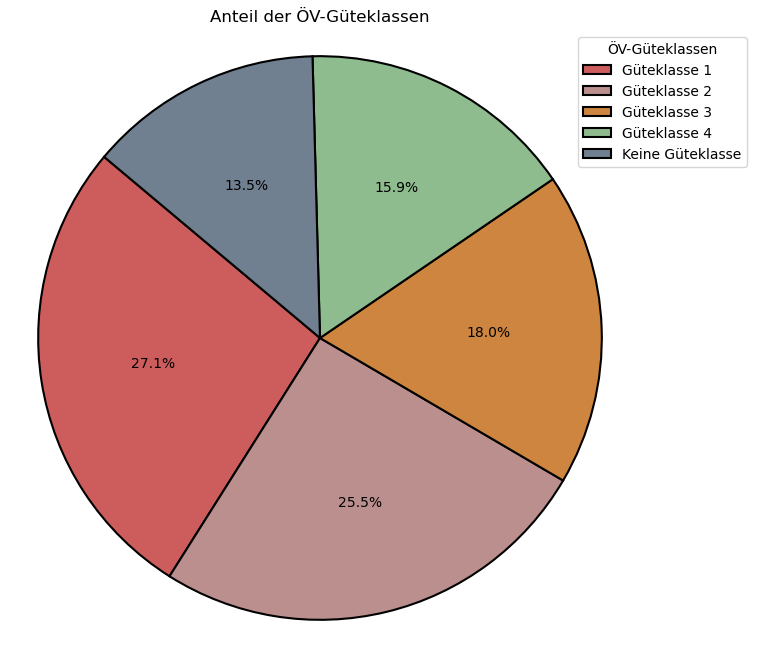

In [186]:
import matplotlib.pyplot as plt

# Beispiel-Daten
gueteklassen_anteil = gdf['HH_OEV_GUETEKLASSE'].value_counts(normalize=True) * 100
labels = ['Güteklasse 1', 'Güteklasse 2', 'Güteklasse 3', 'Güteklasse 4', 'Keine Güteklasse']

# Kreisdiagramm erstellen
plt.figure(figsize=(8, 8))
plt.pie(gueteklassen_anteil, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['indianred', 'rosybrown', 'peru', 'darkseagreen', 'slategrey'], 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})  # Rahmen um die Ausschnitte hinzufügen
plt.title('Anteil der ÖV-Güteklassen')
plt.axis('equal')  # Kreisdiagramm soll kreisförmig sein
plt.legend(title='ÖV-Güteklassen', loc='upper right', bbox_to_anchor=(1.2, 1), labels=labels)
plt.show()
